In [37]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
data = pd.read_csv("/Users/ks/Desktop/Taxi Fare Prediction/Dataset/TaxiFare.csv")
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd435858430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd435858b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4358580a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd435862220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4358625b0>],
 'means': []}

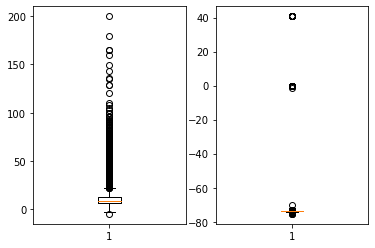

In [9]:
plt.subplot(1,2,1)
plt.boxplot(data.amount)
plt.subplot(1,2,2)
plt.boxplot(data.longitude_of_pickup)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd4355ae0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4355ae7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4355a0cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4355aeee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4355122b0>],
 'means': []}

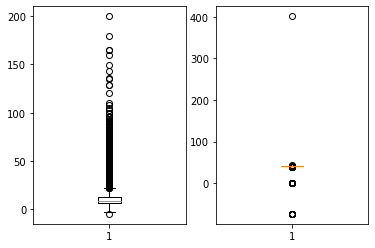

In [11]:
plt.subplot(1,2,1)
plt.boxplot(data.amount)
plt.subplot(1,2,2)
plt.boxplot(data.latitude_of_pickup)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd435b3bf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd435b4c670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd435b3bb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd435b4cd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd435b5a160>],
 'means': []}

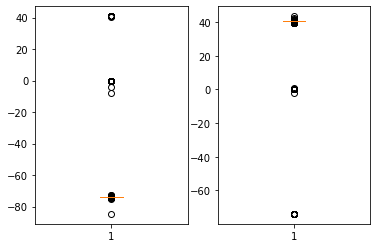

In [14]:
plt.subplot(1,2,1)
plt.boxplot(data.longitude_of_dropoff)
plt.subplot(1,2,2)
plt.boxplot(data.latitude_of_dropoff)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd445685700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd4456859d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd4372d5fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd44568aa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd44568a760>],
 'means': []}

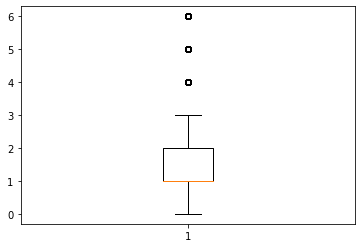

In [18]:
plt.boxplot(data.no_of_passenger)

<AxesSubplot:xlabel='amount', ylabel='count'>

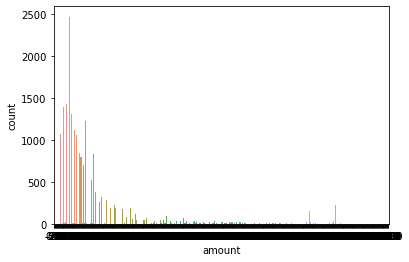

In [19]:
sns.countplot(x="amount",data=data)

In [29]:
x = data.iloc[0:,3:]
y = data.iloc[0:,1]
X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,-73.844311,40.721319,-73.841610,40.712278,1
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1


In [30]:
data

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [46]:
dummy = pd.get_dummies(x)
dummy = pd.get_dummies(dummy,columns=["no_of_passenger"])
scaler = MinMaxScaler()
scaler.fit(dummy)
scaler.data_max_
d = scaler.transform(dummy)
df = pd.DataFrame(d)

In [47]:
trainx,testx,trainy,testy= train_test_split(x,y,test_size = 0.2)

In [48]:
model=LinearRegression().fit(trainx,trainy)

In [49]:
model.score(testx,testy)

0.0003595790213131167

In [86]:
reg2 = DecisionTreeRegressor(random_state=0).fit(trainx,trainy)
reg2.predict(testx)

array([12.9,  6.1, 13. , ..., 11.7,  3.7, 14.5])

In [88]:
reg2.score(testx,testy)

0.5831588228382223

In [53]:
reg3 = RandomForestRegressor(max_depth=2, random_state=0).fit(trainx,trainy)

In [67]:
reg3.predict(trainx)

In [70]:
reg3.score(testx,testy)

0.4126990972964135

In [73]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(trainx)
x1 = pca.explai
ned_variance_ratio_
x1 = pca.explained_variance_ratio_

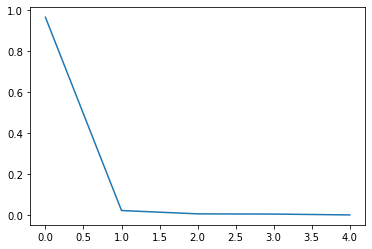

In [75]:
plt.plot(x1)

In [77]:
import numpy as np
x2=np.cumsum(x1)

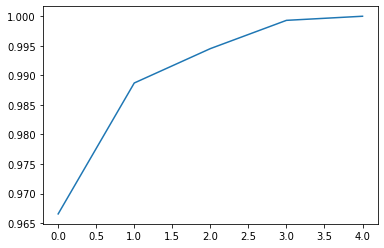

In [79]:
plt.plot(x2)

In [82]:
from sklearn.model_selection import KFold
model1=KFold(n_splits=5).get_n_splits(trainx,trainy)

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,testx,testy)

array([-6.18542402e+01, -5.98145744e-04,  1.17973598e-03,  1.02548565e-03,
       -6.07379781e-04])